## Timeseries Explorer

Achievements now have completion dates for each user and a tally of how many achievements each player completed for every month from Jan 2010 to may 2020.

## Set up timeseries dataframe
Arrange the data so that rows = date, columns = achievements per month, index = player_realm

In [16]:
import os
import pandas as pd
import datetime as dt
import config as cn
from IPython.display import HTML
import numpy as np

file_in = os.path.join(os.path.join(cn.processed_dir, '6-10_scrapes', 'processed_6-10-20',
    'time', 'engaged', 'engaged_time_6-8_dates_100_4500.csv'))

player_cols = ['player', 'realm', 'gear_score', 'last_login', 'time_since_login']
dfa_dates = ['2018-06','2018-07','2018-08','2018-09','2018-10','2018-11','2018-12','2019-01',
            '2019-02','2019-03','2019-04','2019-05','2019-06','2019-07',
            '2019-08','2019-09','2019-10','2019-11','2019-12','2020-01',
            '2020-02','2020-03','2020-04']
keep_cols = player_cols + dfa_dates
keep_cols.append('engagement')
df = pd.read_csv(file_in)
extra_cols = [col for col in df.columns.values if 'unnamed' in col.lower() or  col not in keep_cols]
df = df.drop(extra_cols, axis = 1)                  
df = df.drop_duplicates()
df.head()



,player,realm,gear_score,last_login,time_since_login,2019-01,2020-01,2019-02,2020-02,2019-03,...,2019-08,2018-09,2019-09,2018-10,2019-10,2018-11,2019-11,2018-12,2019-12,engagement
0,effeta,ragnaros,469.0,2020-06-08,-3 days +00:00:00.000000000,7.0,0.0,3.0,3.0,0.0,...,6.0,4.0,1.0,2.0,2.0,2.0,0.0,1.0,0.0,1.0
1,shír,ragnaros,419.0,2020-06-09,-4 days +00:00:00.000000000,2.0,1.0,0.0,0.0,1.0,...,0.0,13.0,0.0,6.0,4.0,1.0,6.0,2.0,0.0,0.0
2,razorwind,ragnaros,446.0,2020-04-30,36 days 00:00:00.000000000,1.0,7.0,0.0,0.0,0.0,...,35.0,0.0,7.0,1.0,4.0,1.0,0.0,1.0,1.0,0.0
3,neocivica,ragnaros,433.0,2019-08-28,282 days 00:00:00.000000000,1.0,5.0,0.0,0.0,0.0,...,19.0,0.0,3.0,0.0,4.0,1.0,0.0,0.0,1.0,0.0
4,kaiseos,ragnaros,432.0,2020-06-09,-4 days +00:00:00.000000000,2.0,0.0,0.0,1.0,0.0,...,3.0,1.0,3.0,0.0,2.0,1.0,0.0,0.0,0.0,2.0


In [17]:
df.describe()

,gear_score,2019-01,2020-01,2019-02,2020-02,2019-03,2020-03,2019-04,2020-04,2019-05,...,2019-08,2018-09,2019-09,2018-10,2019-10,2018-11,2019-11,2018-12,2019-12,engagement
count,14569.000000,14569.000000,14569.000000,14569.000000,14569.000000,14569.000000,14569.000000,14569.000000,14569.000000,14569.000000,...,14569.000000,14569.000000,14569.000000,14569.000000,14569.000000,14569.000000,14569.000000,14569.000000,14569.000000,14569.000000
mean,422.562221,2.502093,3.285881,2.257396,3.698469,2.005560,4.092937,1.688036,4.335370,1.533393,...,2.353696,5.212849,1.248336,2.772874,1.587000,1.858810,1.594619,2.266868,1.587755,0.614661
std,53.321648,4.655220,6.147009,4.553067,6.093543,4.454161,6.302289,4.271127,6.798925,3.889343,...,4.285898,8.138242,3.310384,5.377980,4.046374,4.130679,4.169887,4.303751,4.214313,1.018187
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,400.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,436.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,2.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,462.000000,3.000000,4.000000,3.000000,5.000000,2.000000,6.000000,2.000000,6.000000,1.000000,...,3.000000,8.000000,1.000000,3.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
max,484.000000,62.000000,73.000000,60.000000,74.000000,56.000000,81.000000,69.000000,75.000000,56.000000,...,64.000000,59.000000,61.000000,57.000000,67.000000,51.000000,63.000000,61.000000,69.000000,3.000000


## Transpose Data so the x = time and y = player achievements/month

In [18]:
df.index = [float(str(i).replace('-','')) for i in df.index.values] 

df_m = df.drop(player_cols, axis = 1)
df_m = df_m.groupby('engagement').mean()
display(HTML(df_m.head().to_html()))

,2019-01,2020-01,2019-02,2020-02,2019-03,2020-03,2019-04,2020-04,2019-05,2018-06,2019-06,2018-07,2019-07,2018-08,2019-08,2018-09,2019-09,2018-10,2019-10,2018-11,2019-11,2018-12,2019-12
engagement,,,,,,,,,,,,,,,,,,,,,,,
0.0,2.512178,3.309240,2.263879,3.773691,2.024159,4.175131,1.689183,4.401538,1.534168,0.003353,1.569175,0.001676,3.279262,7.795681,2.366828,5.198304,1.276206,2.771620,1.594024,1.856326,1.625382,2.268908,1.601223
1.0,2.435833,3.074167,2.137500,3.594167,1.940833,3.895833,1.705000,3.978333,1.534167,0.003333,1.490833,0.000833,3.338333,7.771667,2.340833,5.287500,1.058333,2.689167,1.594167,1.914167,1.594167,2.280000,1.527500
2.0,2.493520,3.172110,2.286159,3.318300,1.961638,3.666667,1.692068,3.994298,1.548471,0.004666,1.519959,0.003110,3.100570,8.091239,2.234837,5.240539,1.064282,2.720581,1.472784,1.718507,1.487299,2.190772,1.516848
3.0,2.497306,3.468052,2.274827,3.772132,1.985373,4.266359,1.657429,4.655119,1.504234,0.004619,1.468052,0.005389,3.153195,8.331794,2.439569,5.216320,1.479600,2.937644,1.695150,2.035412,1.514242,2.351809,1.643572


## Get mean achievements per month

In [19]:
dft = df_m.T.reset_index()
dft = dft.iloc[1:][:]
dft.columns = ['dates','active','risk','lapsed','inactive']
dft.dates = pd.to_datetime(dft.dates)
dft.set_index('dates', inplace=True)
display(HTML(dft.to_html()))

,active,risk,lapsed,inactive
dates,,,,
2020-01-01,3.309240,3.074167,3.172110,3.468052
2019-02-01,2.263879,2.137500,2.286159,2.274827
2020-02-01,3.773691,3.594167,3.318300,3.772132
2019-03-01,2.024159,1.940833,1.961638,1.985373
2020-03-01,4.175131,3.895833,3.666667,4.266359
2019-04-01,1.689183,1.705000,1.692068,1.657429
2020-04-01,4.401538,3.978333,3.994298,4.655119
2019-05-01,1.534168,1.534167,1.548471,1.504234
2018-06-01,0.003353,0.003333,0.004666,0.004619


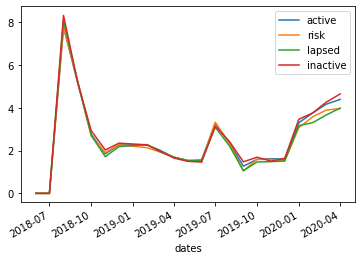

In [21]:
dft.plot()

## Plot mean achievements per month

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import datetime as dt
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(20, 10))
a = ax.plot(sorted(dft.dates.astype(float)), dft.active, label = 'quester', ms = 4, color = 'green', alpha = 0.5)
#a = ax.axvline(sorted(df_exp.index.values)), ls = ':', color = 'silver', ms = 8)
a = ax.set_xlabel('\nTime (years)', fontsize = 20)
a = ax.set_ylabel('Achievements/Month \n', fontsize = 20)
a = ax.tick_params(labelsize = 16)